<a href="https://colab.research.google.com/github/zak-era12/Student-Performance/blob/main/student_performace_(logistic_Reg%2BRF).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn import preprocessing
import matplotlib
matplotlib.rcParams['font.size'] = 16
#matplotlib.rcParams['figure.figsize'] = (10, 10)
matplotlib.rcParams['figure.facecolor'] = '#000000'
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="ticks", color_codes=True)

In [ ]:
data=pd.read_csv('/content/StudentsPerformance.csv')
data.head(20)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [ ]:
data['Total_score']=data.iloc[:,5:].sum(axis=1)
print(data)

     gender race/ethnicity  ... writing score Total_score
0    female        group B  ...            74         218
1    female        group C  ...            88         247
2    female        group B  ...            93         278
3      male        group A  ...            44         148
4      male        group C  ...            75         229
..      ...            ...  ...           ...         ...
995  female        group E  ...            95         282
996    male        group C  ...            55         172
997  female        group C  ...            65         195
998  female        group D  ...            77         223
999  female        group D  ...            86         249

[1000 rows x 9 columns]


In [ ]:
data['Percentage']=(data['Total_score']/300)*100
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_score,Percentage
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333


In [ ]:
passmark = 40
plt.rcParams['figure.figsize']= (18,12)
data['status']=np.where(data['Percentage']< passmark ,'Fail', 'Pass')
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_score,Percentage,status
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667,Pass
1,female,group C,some college,standard,completed,69,90,88,247,82.333333,Pass
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667,Pass
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333,Pass
4,male,group C,some college,standard,none,76,78,75,229,76.333333,Pass
...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000,Pass
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333,Pass
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000,Pass
998,female,group D,some college,standard,completed,68,78,77,223,74.333333,Pass


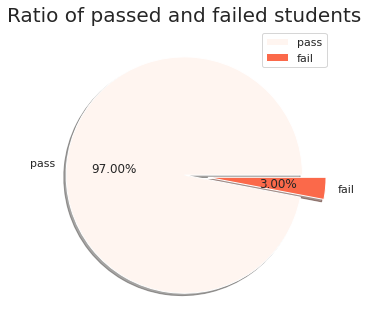

In [ ]:
# pie chart to represent the ratio of pass and fail status between the students

size = data['status'].value_counts()
colors = plt.cm.Reds(np.linspace(0, 1, 3))
labels = "pass", "fail"
explode = [0, 0.2]
plt.subplot(1, 3, 1)
plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%', explode = explode, shadow = True)
plt.title('Ratio of passed and failed students', fontsize = 20)
plt.legend()

Assigning grades to students based on the percentage their acquired.

0  - 40 marks : grade E

41 - 60 marks : grade D

61 - 70 marks : grade C

71 - 80 marks : grade B

81 - 90 marks : grade A

91 - 100 marks : grade O

In [ ]:
def getgrade (Percentage,status):
  if status == 'Fail':
    return 'E'
  if(Percentage >= 90):
    return 'O'
  if(Percentage >= 80):
    return 'A'
  if(Percentage >= 70):
    return 'B'
  if(Percentage >= 60):
    return 'C'
  if(Percentage >= 40):
    return 'D'
  else :
    return 'E'

data['grades'] = data.apply(lambda x: getgrade(x['Percentage'], x['status']), axis = 1 )

In [ ]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_score,Percentage,status,grades
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667,Pass,B
1,female,group C,some college,standard,completed,69,90,88,247,82.333333,Pass,A
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667,Pass,O
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333,Pass,D
4,male,group C,some college,standard,none,76,78,75,229,76.333333,Pass,B
...,...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000,Pass,O
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333,Pass,D
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000,Pass,C
998,female,group D,some college,standard,completed,68,78,77,223,74.333333,Pass,B


In [ ]:
data.drop(data.columns[[11]], axis=1)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_score,Percentage,status
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667,Pass
1,female,group C,some college,standard,completed,69,90,88,247,82.333333,Pass
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667,Pass
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333,Pass
4,male,group C,some college,standard,none,76,78,75,229,76.333333,Pass
...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000,Pass
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333,Pass
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000,Pass
998,female,group D,some college,standard,completed,68,78,77,223,74.333333,Pass


In [ ]:
data.describe()

,math score,reading score,writing score,Total_score,Percentage
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,203.312000,67.770667
std,15.16308,14.600192,15.195657,42.771978,14.257326
min,0.00000,17.000000,10.000000,27.000000,9.000000
25%,57.00000,59.000000,57.750000,175.000000,58.333333
50%,66.00000,70.000000,69.000000,205.000000,68.333333
75%,77.00000,79.000000,79.000000,233.000000,77.666667
max,100.00000,100.000000,100.000000,300.000000,100.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   1000 non-null   int64  
 6   reading score                1000 non-null   int64  
 7   writing score                1000 non-null   int64  
 8   Total_score                  1000 non-null   int64  
 9   Percentage                   1000 non-null   float64
 10  status                       1000 non-null   object 
 11  grades                       1000 non-null   object 
dtypes: float64(1), int64(4), object(7)
memory usage: 93.9+ KB


In [ ]:
#checking the missing values
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
Total_score                    0
Percentage                     0
status                         0
grades                         0
dtype: int64

In [ ]:
dataset=pd.DataFrame(data,columns=['status'])
dataset

,status
0,Pass
1,Pass
2,Pass
3,Pass
4,Pass
...,...
995,Pass
996,Pass
997,Pass
998,Pass


In [ ]:
df_one=pd.get_dummies(dataset['status'])
df_one

,Fail,Pass
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
995,0,1
996,0,1
997,0,1
998,0,1


In [ ]:
df_two = pd.concat((df_one,dataset),axis=1)
df_two

,Fail,Pass,status
0,0,1,Pass
1,0,1,Pass
2,0,1,Pass
3,0,1,Pass
4,0,1,Pass
...,...,...,...
995,0,1,Pass
996,0,1,Pass
997,0,1,Pass
998,0,1,Pass


In [ ]:
#df_two = df_two.drop(['Fail'],axis=1)
#df_two=df_two.drop(["Fail"],axis=1)
result=df_two.rename(columns={"Pass":"status(binary)"})
print(result)

     Fail  status(binary) status
0       0               1   Pass
1       0               1   Pass
2       0               1   Pass
3       0               1   Pass
4       0               1   Pass
..    ...             ...    ...
995     0               1   Pass
996     0               1   Pass
997     0               1   Pass
998     0               1   Pass
999     0               1   Pass

[1000 rows x 3 columns]


In [ ]:
type(result)

pandas.core.frame.DataFrame

In [ ]:
data.append(result)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_score,Percentage,status,grades,Fail,status(binary)
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0,218.0,72.666667,Pass,B,NaN,NaN
1,female,group C,some college,standard,completed,69.0,90.0,88.0,247.0,82.333333,Pass,A,NaN,NaN
2,female,group B,master's degree,standard,none,90.0,95.0,93.0,278.0,92.666667,Pass,O,NaN,NaN
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0,148.0,49.333333,Pass,D,NaN,NaN
4,male,group C,some college,standard,none,76.0,78.0,75.0,229.0,76.333333,Pass,B,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pass,NaN,0.0,1.0
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pass,NaN,0.0,1.0
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pass,NaN,0.0,1.0
998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pass,NaN,0.0,1.0


In [ ]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_score,Percentage,status,grades
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667,Pass,B
1,female,group C,some college,standard,completed,69,90,88,247,82.333333,Pass,A
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667,Pass,O
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333,Pass,D
4,male,group C,some college,standard,none,76,78,75,229,76.333333,Pass,B
...,...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000,Pass,O
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333,Pass,D
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000,Pass,C
998,female,group D,some college,standard,completed,68,78,77,223,74.333333,Pass,B


In [ ]:
#data.drop(data.columns[[3,4,5,6,7,8,9,11,12]])
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_score,Percentage,status,grades
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667,Pass,B
1,female,group C,some college,standard,completed,69,90,88,247,82.333333,Pass,A
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667,Pass,O
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333,Pass,D
4,male,group C,some college,standard,none,76,78,75,229,76.333333,Pass,B
...,...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000,Pass,O
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333,Pass,D
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000,Pass,C
998,female,group D,some college,standard,completed,68,78,77,223,74.333333,Pass,B


In [ ]:
data2=pd.get_dummies(data,columns=['gender','race/ethnicity','parental level of education','lunch','status'])

In [ ]:
data2

,test preparation course,math score,reading score,writing score,Total_score,Percentage,grades,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,status_Fail,status_Pass
0,none,72,72,74,218,72.666667,B,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,completed,69,90,88,247,82.333333,A,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1
2,none,90,95,93,278,92.666667,O,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,none,47,57,44,148,49.333333,D,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,none,76,78,75,229,76.333333,B,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,completed,88,99,95,282,94.000000,O,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1
996,none,62,55,55,172,57.333333,D,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1
997,completed,59,71,65,195,65.000000,C,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1
998,completed,68,78,77,223,74.333333,B,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1


In [ ]:
data2.columns

Index(['test preparation course', 'math score', 'reading score',
       'writing score', 'Total_score', 'Percentage', 'grades', 'gender_female',
       'gender_male', 'race/ethnicity_group A', 'race/ethnicity_group B',
       'race/ethnicity_group C', 'race/ethnicity_group D',
       'race/ethnicity_group E',
       'parental level of education_associate's degree',
       'parental level of education_bachelor's degree',
       'parental level of education_high school',
       'parental level of education_master's degree',
       'parental level of education_some college',
       'parental level of education_some high school', 'lunch_free/reduced',
       'lunch_standard', 'status_Fail', 'status_Pass'],
      dtype='object')

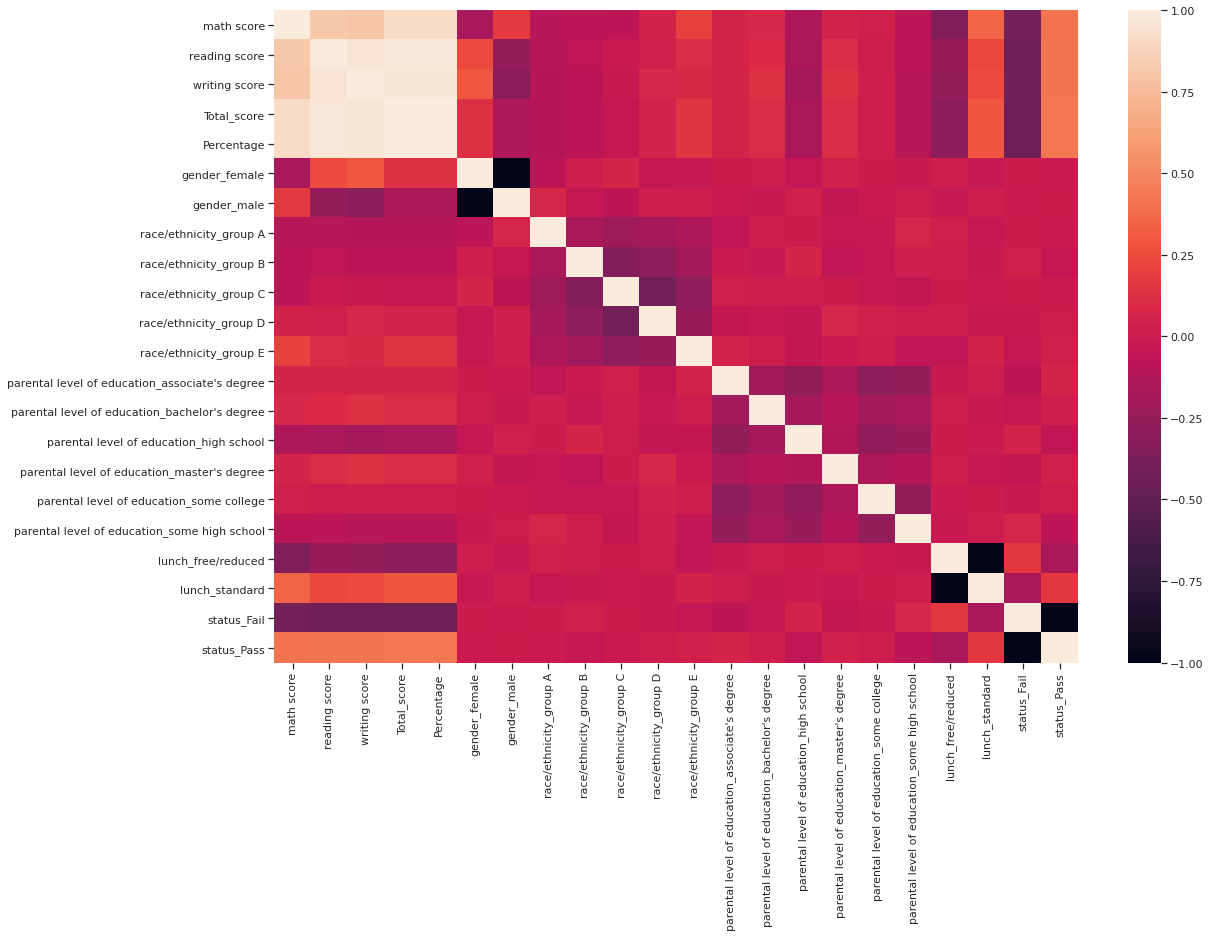

In [ ]:
sns.heatmap(data2.corr())
plt.show()

In [ ]:
# Split the data into training and test sets
x=data2.iloc[:,8:23]
y=data2.iloc[:,23]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [ ]:
x

,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,status_Fail
0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
2,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
3,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0
4,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
996,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0
997,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
998,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0


In [ ]:
y

0      1
1      1
2      1
3      1
4      1
      ..
995    1
996    1
997    1
998    1
999    1
Name: status_Pass, Length: 1000, dtype: uint8

In [ ]:
x_train.shape

(750, 15)

In [ ]:
y_train.shape

(750,)

In [ ]:
x_test.shape

(250, 15)

In [ ]:
y_test.shape

(250,)

In [ ]:
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = classifier.predict(x_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[  7   3]
 [  0 240]]


From this we can infer that there are 7+240 correct predictions and 3+0 incorrect prediction made by the model

> Indented block



Accuracy

In [ ]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.99


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.99      1.00      0.99       240

    accuracy                           0.99       250
   macro avg       0.99      0.85      0.91       250
weighted avg       0.99      0.99      0.99       250



INTERPRETATION 
From the given test set 92% of students have passed 


**Precision **is the ratio between the True Positives and all the Positives.Precision is a measure that tells us what proportion of patients that we diagnosed as having cancer, actually had cancer.

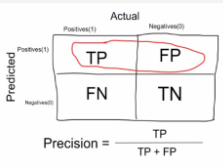
RECALL OR SENSITIVITY
- The recall is the measure of our model correctly identifying True Positives.• Recall is a measure that tells us what proportion of patients that actually had cancer was diagnosed by the algorithm as having cancer.
The actual positives (People having cancer are TP and FN) and the people diagnosed by the model having a cancer are TP. (Note: FN is included because the Person actually had a cancer even though the model predicted otherwise).

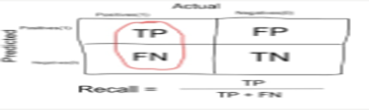


**RANDOM FOREST**


In [ ]:
x

,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,status_Fail
0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
2,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
3,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0
4,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
996,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0
997,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
998,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0


In [ ]:
y

0      1
1      1
2      1
3      1
4      1
      ..
995    1
996    1
997    1
998    1
999    1
Name: status_Pass, Length: 1000, dtype: uint8

In [ ]:
x_train.shape

(750, 15)

In [ ]:
y_train.shape

(750,)

In [ ]:
x_test.shape

(250, 15)

In [ ]:
y_test.shape

(250,)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier_rt=RandomForestClassifier(n_estimators=5)
classifier_rt.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

n_estimators defines the number of tress we want to be built


classifer_rt is the model on which we are going to test x_test set

For hyper-parameter-tuning change the n_estimator value eg:10 or 20
The greater value of the n_estimator the greater the accurancy. But this can also lead to overfitting of the model.

In [ ]:
y_pred=classifier_rt.predict(x_test)

In [ ]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=uint8)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)

Confusion Matrix:
[[  8   2]
 [  0 240]]


In [ ]:
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.99      1.00      1.00       240

    accuracy                           0.99       250
   macro avg       1.00      0.90      0.94       250
weighted avg       0.99      0.99      0.99       250



In [ ]:
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Accuracy: 0.992
